In [1]:
#Working directory set
import sys
sys.path.append("../scripts/")

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from clean_data import load_and_clean_data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import shap

pd.set_option('display.max_rows', 400)

In [3]:
X_train, X_test, y_train, y_test = load_and_clean_data()

Columns (10,17,19,23,25,27,28,29,30,32,33,36,37,38,39,40,41,42,43,50,51,83,86,89,92,94,95,97,100,103,106,110,113,116,121,124,127,130,133,136,188,190,201,212,231,232,242,244,247,249,256,262,267,273,279,280,281,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,305,318,320,333,334) have mixed types.Specify dtype option on import or set low_memory=False.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
final_features = pd.read_csv('feature_selection_final_columns.csv')
final_features.rename(columns = {'0': 'feat'}, inplace = True)

In [5]:
features = final_features['feat']

In [18]:
X_train_sub = X_train[X_train.columns[0:35]]

In [19]:
# train  model (this will be the final model but for now just untuned DT)
model = DecisionTreeClassifier().fit(X_train_sub, y_train)

In [20]:
# compute SHAP values
explainer = shap.TreeExplainer(model, X_train_sub)

In [21]:
explainer

In [1]:
shap_values = explainer(X_train_sub)

NameError: name 'explainer' is not defined

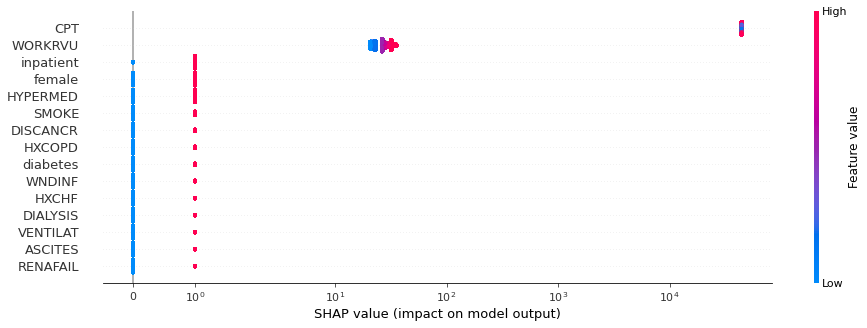

In [17]:
shap.summary_plot(shap_values.data, X_train_sub, max_display = 20, use_log_scale=True, plot_size = (15,5))